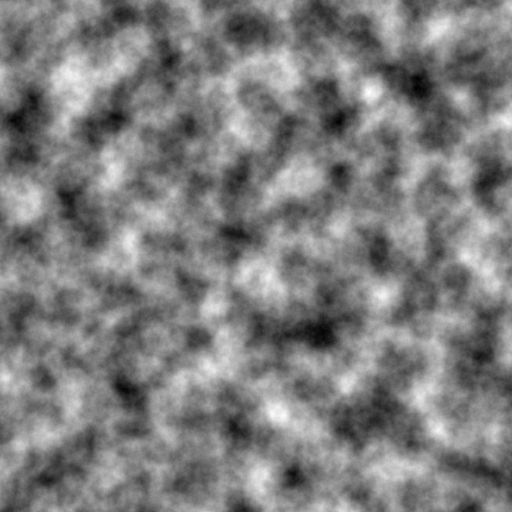

In [ ]:
import noise
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 


shape = (256,256)
scale = 50
octaves = 8
persistence = 0.5
lacunarity = 2.0

world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=shape[0], 
                                    repeaty=shape[1], 
                                    base=0)
world = world
world_norm = (world  - world.min()) / (world.max() - world.min()) * 255
world_norm = world_norm.astype(np.uint8)
img = Image.fromarray(world_norm, mode='L')
img
        
# Image.fromarray(world).show()

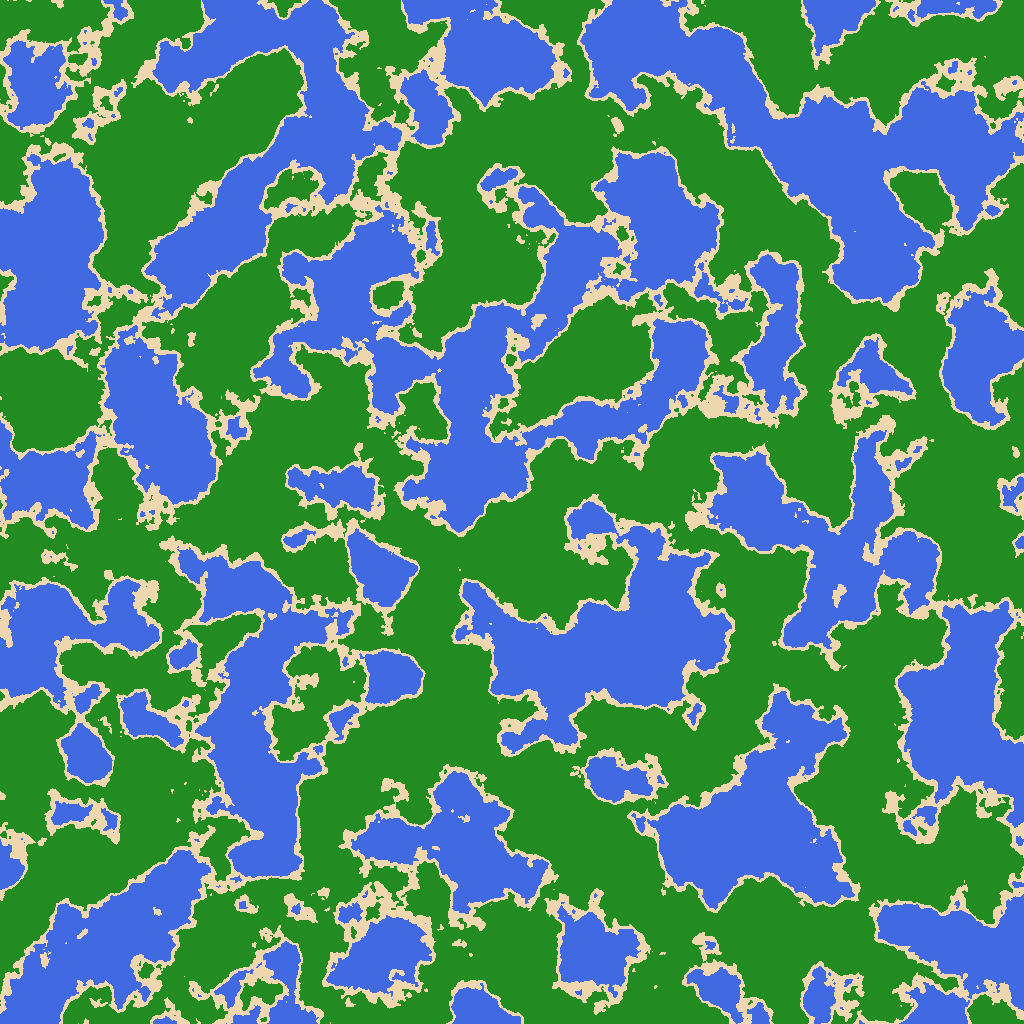

In [ ]:
blue = [65,105,225]
green = [34,139,34]
beach = [238, 214, 175]

def add_color(world):
      b = 0
      g = 0
      bea = 0
      color_world = np.zeros(world.shape+(3,))
      for i in range(shape[0]):
            for j in range(shape[1]):
                  if world[i][j] < -0.05:
                        color_world[i][j] = blue
                        b += 1
                  elif world[i][j] < 0:
                        color_world[i][j] = beach
                        bea += 1
                  elif world[i][j] < 1.0:
                        color_world[i][j] = green
                        g += 1
      return color_world

color_world = add_color(world)
color_world = color_world.astype(np.uint8)
img_color = Image.fromarray(color_world, mode='RGB')
img_color


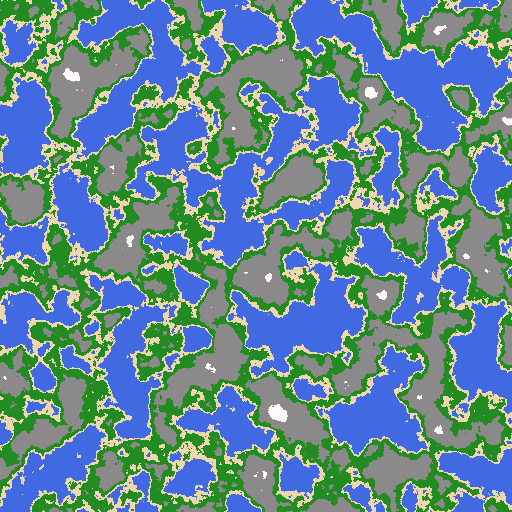

In [86]:
blue = (65,105,225)
green = (34,139,34)
beach = (238, 214, 175)
snow = (255, 250, 250)
mountain = (139, 137, 137)

def add_color(world):
      color_world = np.zeros(world.shape+(3,))
      for i in range(shape[0]):
            for j in range(shape[1]):
                  if world[i][j] < -0.05:
                        color_world[i][j] = blue
                  elif world[i][j] < 0:
                        color_world[i][j] = beach
                  elif world[i][j] < 0.1:
                        color_world[i][j] = green
                  elif world[i][j] < 0.35:
                        color_world[i][j] = mountain
                  elif world[i][j] < 1.0:
                        color_world[i][j] = snow
      return color_world
                
color_world = add_color(world)
color_world = color_world.astype(np.uint8)
img_color_mountain = Image.fromarray(color_world, mode='RGB')
display(img_color_mountain)




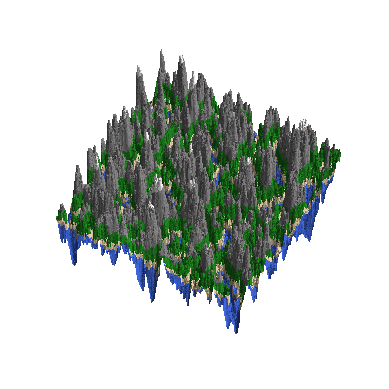

<Figure size 640x480 with 0 Axes>

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = color_world / 255
x = np.linspace(0,world_norm.shape[0]-1,world_norm.shape[0])
y = np.linspace(0,world_norm.shape[0]-1,world_norm.shape[0])
x, y = np.meshgrid(x, y)
surf = ax.plot_surface(x, y, world_norm, facecolors=colors, rstride=1, cstride=1, linewidth=0, antialiased=False)
# plt.plot(x,y, world_norm, color = tuple(colors))
ax.view_init(elev=50, azim=120)
ax.grid(False)
ax.set_axis_off()
plt.show()
plt.savefig('fig')

In [48]:
from PIL import Image
import torch
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image

from transformers import AutoImageProcessor, UperNetForSemanticSegmentation
import numpy as np





controlnet = ControlNetModel.from_pretrained(
"lllyasviel/sd-controlnet-seg"
)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
"runwayml/stable-diffusion-v1-5", controlnet=controlnet, safety_checker=None
)
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)



Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/20 [00:00<?, ?it/s]

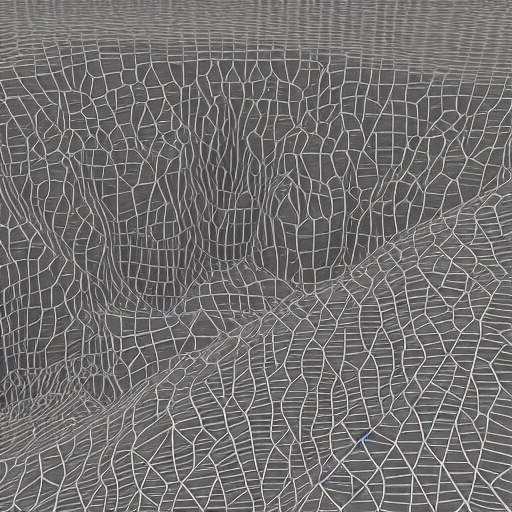

In [70]:
image_controlnet = pipe("Color this image with the colors of water, grass, sand, mountain, and snow to make a 3D game area", img, num_inference_steps=20).images[0]
image_controlnet

  0%|          | 0/20 [00:00<?, ?it/s]

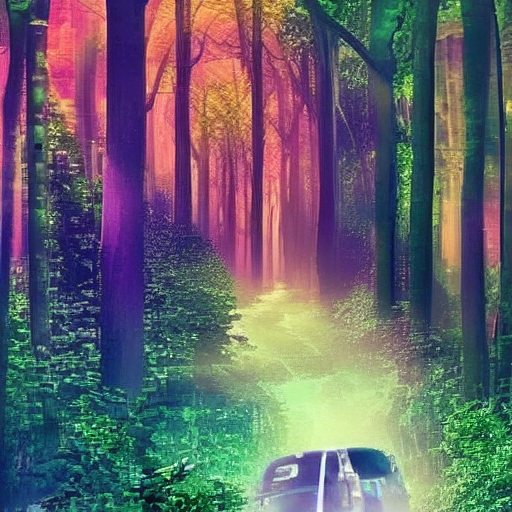

In [71]:
image_controlnet2 = pipe("Nake a Scene that would fit in this world ", img, num_inference_steps=20).images[0]
image_controlnet2

  0%|          | 0/20 [00:00<?, ?it/s]

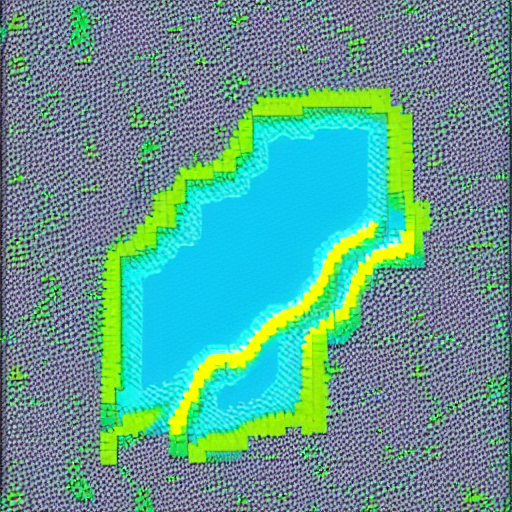

In [72]:
image_controlnet = pipe("Create a landscape of ocean, land, and beach using only the colors {blue}, {green}, and {beach} for blue green and yellow and no other colors. Emualte the style of a 8bit game", img, num_inference_steps=20).images[0]
image_controlnet

  0%|          | 0/20 [00:00<?, ?it/s]

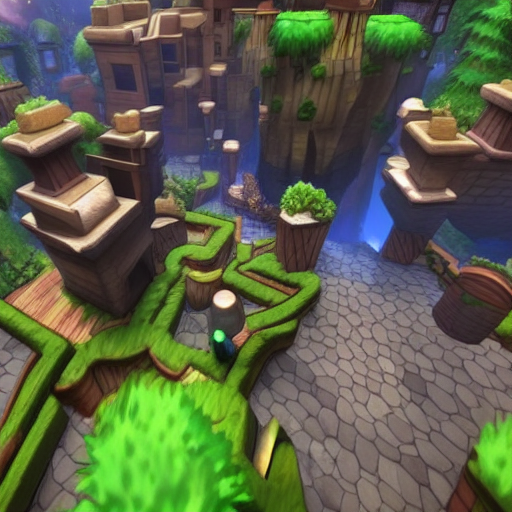

In [75]:
image_controlnet = pipe("Create what would come next to this area in a video game", img_color_mountain, num_inference_steps=20).images[0]
image_controlnet

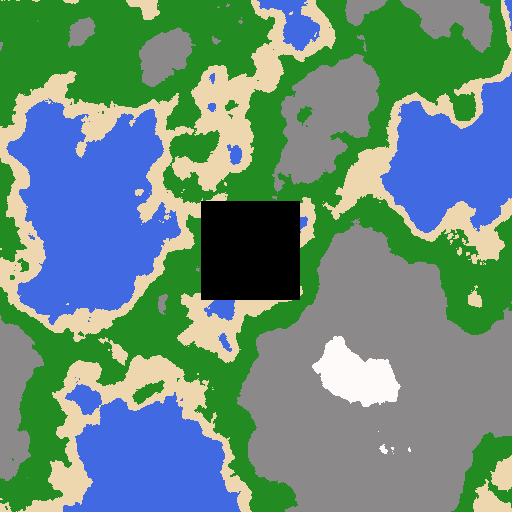

In [ ]:
# blue = (65,105,225)
# green = (34,139,34)
# beach = (238, 214, 175)
# snow = (255, 250, 250)
# mountain = (139, 137, 137)

# def add_color(world):
#       color_world_mask = np.zeros(world.shape+(3,))
#       for i in range(shape[0]):
#             for j in range(shape[1]):
#                   if(i < 300 and i > 200 and j < 300 and j > 200):
#                         color_world_mask[i][j] = (0,0,0)
#                   elif world[i][j] < -0.05:
#                         color_world_mask[i][j] = blue
#                   elif world[i][j] < 0:
#                         color_world_mask[i][j] = beach
#                   elif world[i][j] < 0.1:
#                         color_world_mask[i][j] = green
#                   elif world[i][j] < 0.35:
#                         color_world_mask[i][j] = mountain
#                   elif world[i][j] < 1.0:
#                         color_world_mask[i][j] = snow
#       return color_world_mask
                
# color_world_mask = add_color(world)
# color_world_mask = color_world_mask.astype(np.uint8)
# img_color_mountain_mask = Image.fromarray(color_world_mask, mode='RGB')
# display(img_color_mountain_mask)




  0%|          | 0/20 [00:00<?, ?it/s]

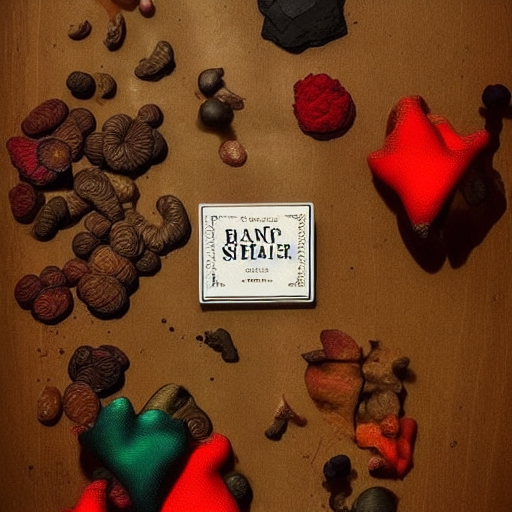

In [ ]:
# image_controlnet = pipe("The black share is missing. Fill it in with color so it matches the rest of the image", img_color_mountain_mask, num_inference_steps=20).images[0]
# image_controlnet

  0%|          | 0/20 [00:00<?, ?it/s]

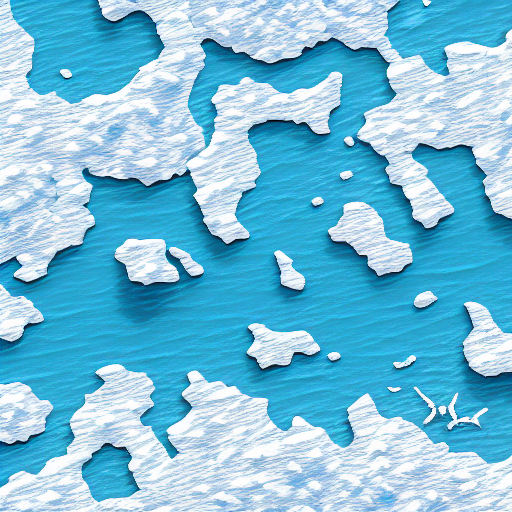

In [ ]:
image_controlnet = pipe("Create a two dimensional game region of the ocean, beach, mountains, grass, and snow.", img, num_inference_steps=20).images[0]
image_controlnet


